## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [167]:
# Installing the libraries with the specified version.
!pip install numpy==1.26.0 pandas==2.2.2 matplotlib==3.8.0 scikit-learn==1.3.2 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [168]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [169]:
df  = pd.read_csv('/content/EasyVisa.csv')
data = df.copy()

In [170]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Observation
1. Import the test data-set successfully
2. All the columns are displayed as described in the data description

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [171]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [172]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


##### Observation
1. The first and last 5 rows are displayed successfully

#### Understand the shape of the dataset

In [173]:
data.shape

(25480, 12)

##### Observation:
There are 25480 rows and 12 columns

#### Check the data types of the columns for the dataset

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [175]:
# Convert the DType 'object' to 'Category'
cols = data.select_dtypes(['object'])
for i in cols.columns:
    data[i] = data[i].astype('category')

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


##### Observation
1. There are 3 columns are numerical type - 'no_of_employees', 'yr_of_estab', 'prevailing_wage'
2. There are 9 columns are category type - 'case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'
3. There are no missing values in the dataset



In [177]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [178]:
data.duplicated().sum()

np.int64(0)

##### Observation
1. No duplicate records and null values

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [179]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV9999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Observation
1. Case ID has all unique values.
2. There are 6 contients in the dataset and Asia is the most common data in the dataset - 16861 out of 25480
3. There are 4 values in the 'education_of_employee' column - 10234 out of 25480
4. Most of the people don't require training - 22525 out of 25480
5. 'no_of_employees' column has negative values
6. There are 5 unique value on region of employment. The most requested region is Northeast with 7195.
7. Most units of wage are Year, with 22962 out of 25480. There are 4 unique values.
8. 22773 workers have a full time job.
9. 17018 visas out of 25480 were certified.

#### Fixing the negative values in number of employees columns

In [180]:
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

In [181]:
data["no_of_employees"] = abs(data["no_of_employees"])

#### Let's check the count of each unique category in each of the categorical variables

In [182]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("category").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV9999     1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV10000    1
EZYV1000     1
EZYV100      1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [183]:
# Checking that 'case_id' has all unique values
data.case_id.nunique()

25480

In [184]:
# Dropping the column with all unique values and it won't add more values in modeling and analysis
data = data.drop(['case_id'], axis=1)

### Univariate Analysis

In [185]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [186]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

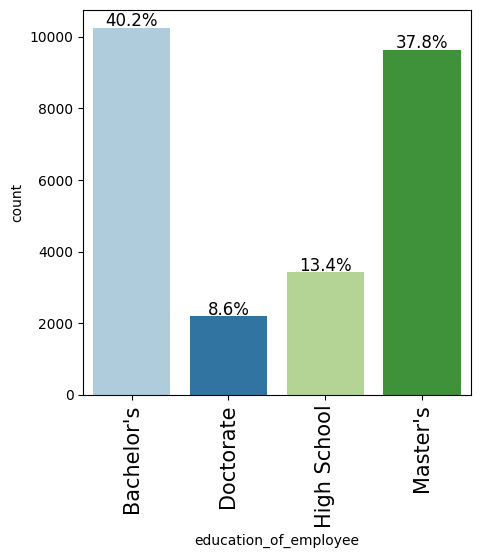

In [187]:
labeled_barplot(data, 'education_of_employee');

##### Observation
1. 40.2% workers hold a Bachelor's degree.
2. 37.8% workers hold a Master's degree.
3. 13.4% workers hold a High School degree.
4. 8.6% workers hold a Doctorate degree.

#### Observations on region of employment

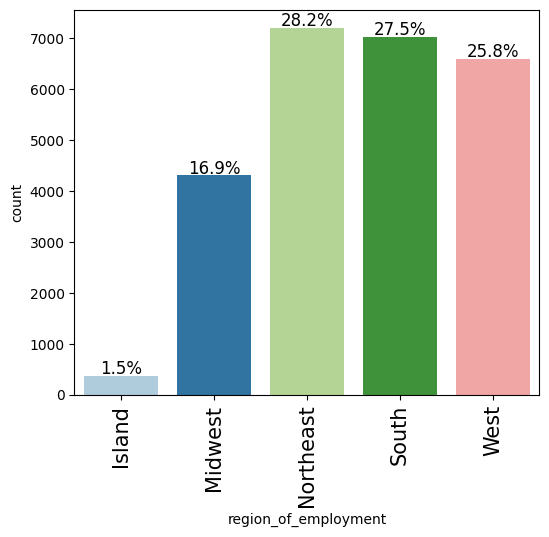

In [188]:
labeled_barplot(data, 'region_of_employment');

##### Observation
1. The majority of workers prefer to be employed in the Northeast, South, or West regions, with 25% to 29% selecting these areas.
2. Fewer than 2% choose the Island region for employment.S.

#### Observations on job experience

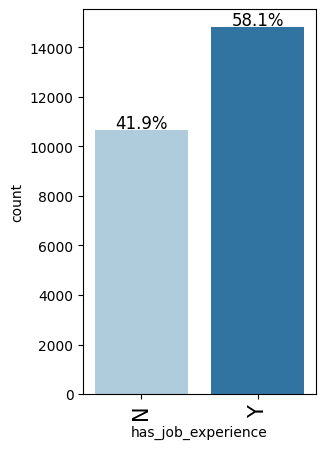

In [189]:
labeled_barplot(data, 'has_job_experience');

##### Observation
Most of the workers have job experience

#### Observations on case status

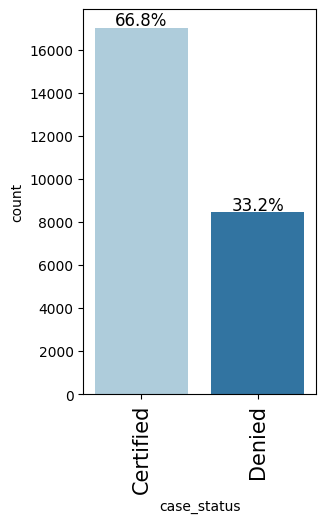

In [190]:
labeled_barplot(data, 'case_status');

##### Observation
There are 66.8% employee are certified

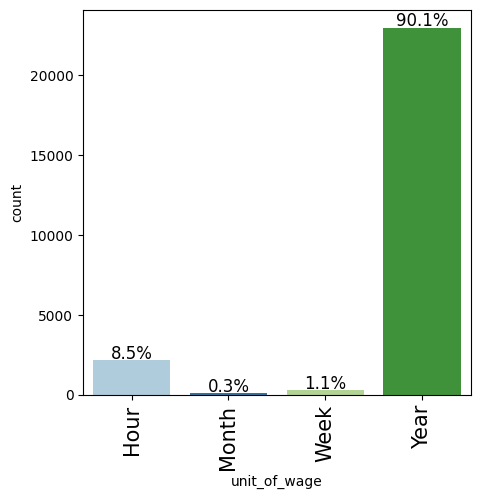

In [191]:
labeled_barplot(data, 'unit_of_wage')

##### Observation
1. Most of the wages are represented yearly (90.1%).
2. 8.5% of the wages are hourly.
3. Very few unit of wage are weekly or monthly.

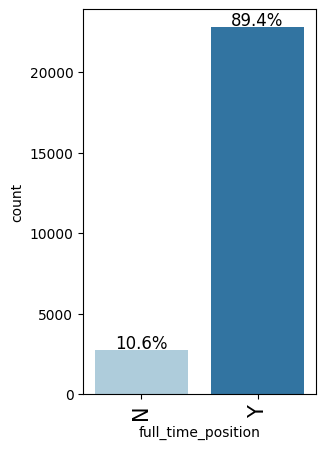

In [192]:
labeled_barplot(data, 'full_time_position')

##### Observation
89% of the positions are full time.

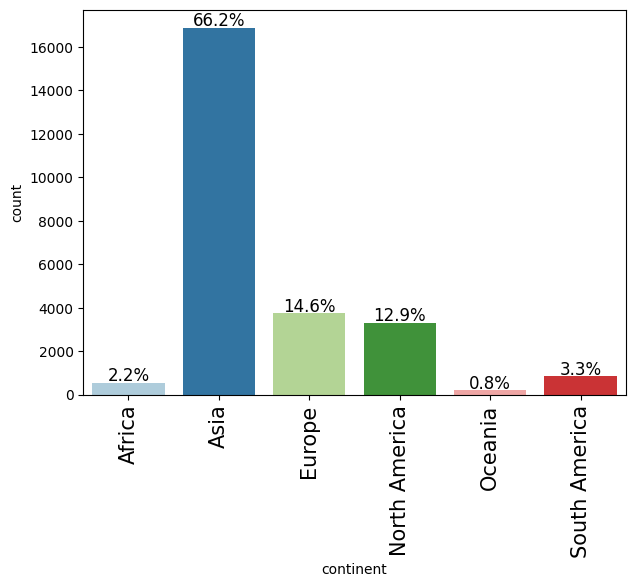

In [193]:
labeled_barplot(data, 'continent')

##### Observation
1. More than have of the workers are from Asia (66.2%).
2. Followed by Europe and North America with 14.6% and 12.9% respectively.
3. South America, Africa, and Oceania have very low percentages.

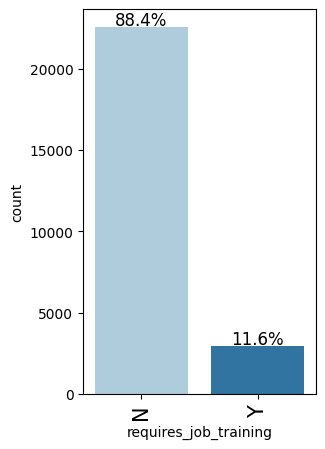

In [194]:
labeled_barplot(data, 'requires_job_training')

##### Observation
1. 88.4% of the workers don't require job training.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [195]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [196]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


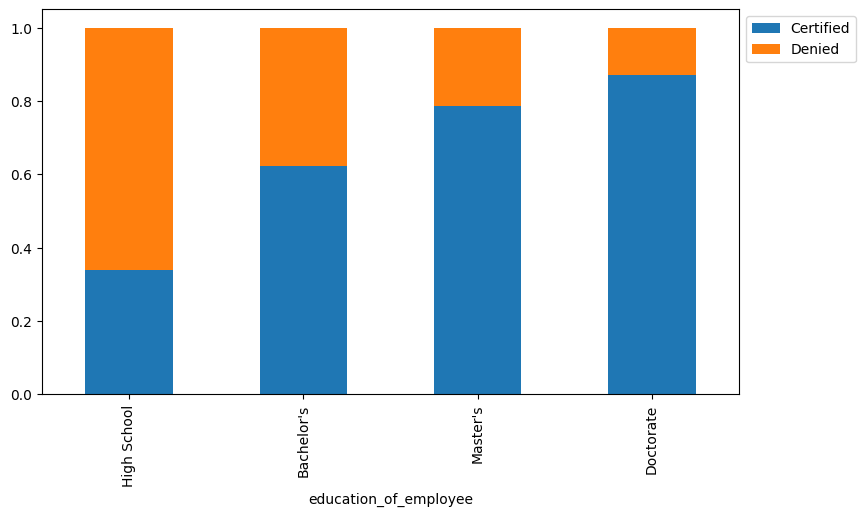

In [197]:
stacked_barplot(data, 'education_of_employee','case_status')

Higher education, particularly graduate-level degrees (Master’s and Doctorate), substantially increases the chances of visa certification.

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


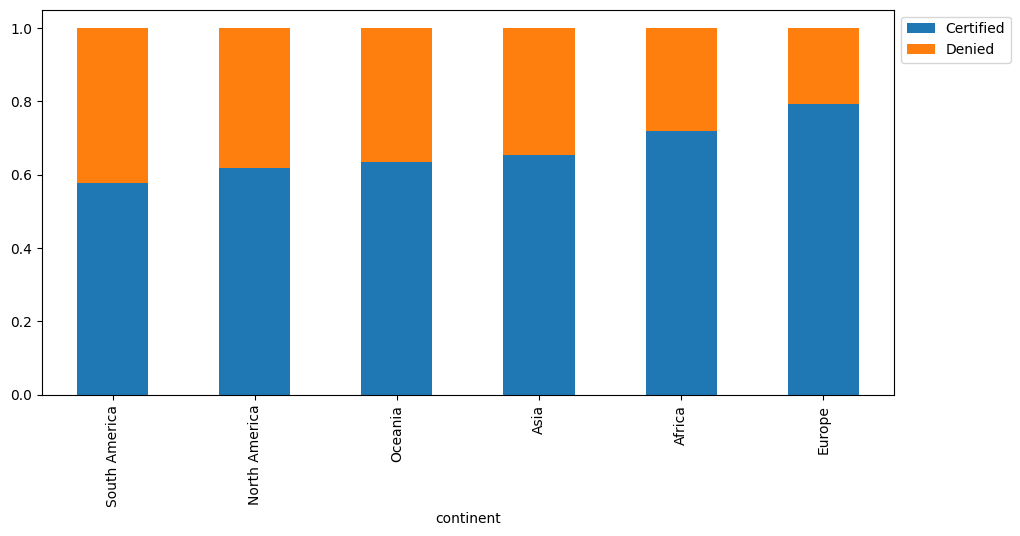

In [198]:
stacked_barplot(data, 'continent','case_status')

Visa approval rates vary significantly by continent, with Europe and Africa seeing higher certification rates and South America and North America experiencing higher denial rates

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


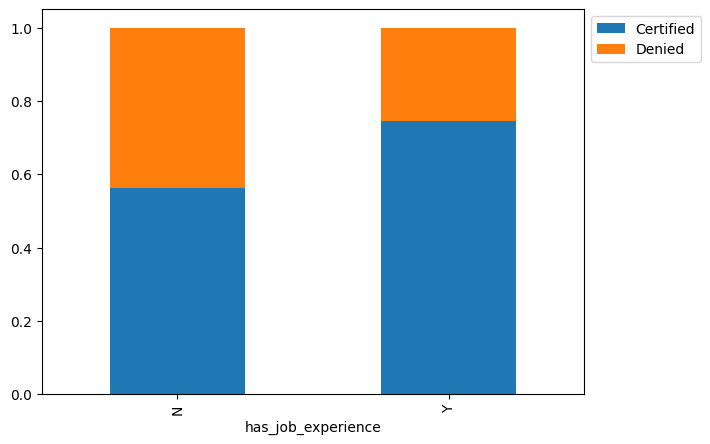

In [199]:
stacked_barplot(data, 'has_job_experience','case_status')

Having prior work experience greatly improves the likelihood of a visa being certified.

#### Is the prevailing wage consistent across all regions of the US?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


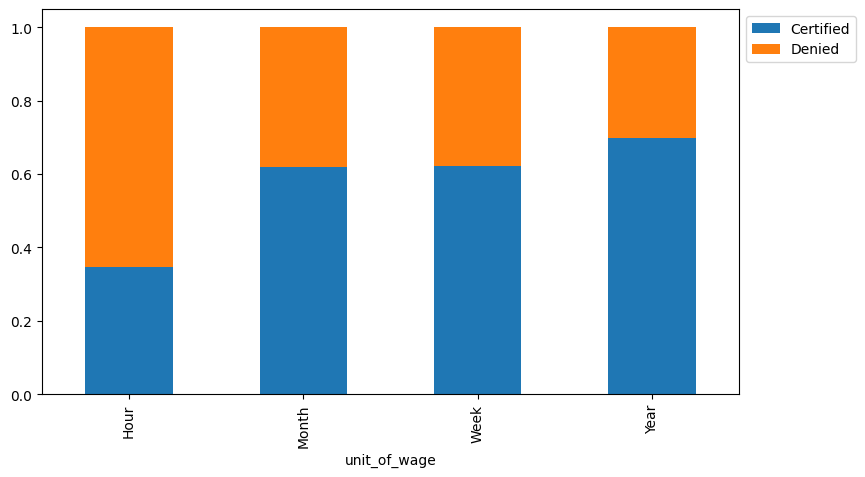

In [200]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

The vast majority of cases (90%+) report wages on a yearly basis, and these have the highest certification rate (69.9%).

Hourly wage cases have a low certification rate (34.6%), which could reflect lower-skilled jobs, inconsistent wage reporting, or applications more prone to scrutiny.

Monthly and weekly wage cases are relatively few, and their certification rates (~62%) fall between hourly and yearly rates.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

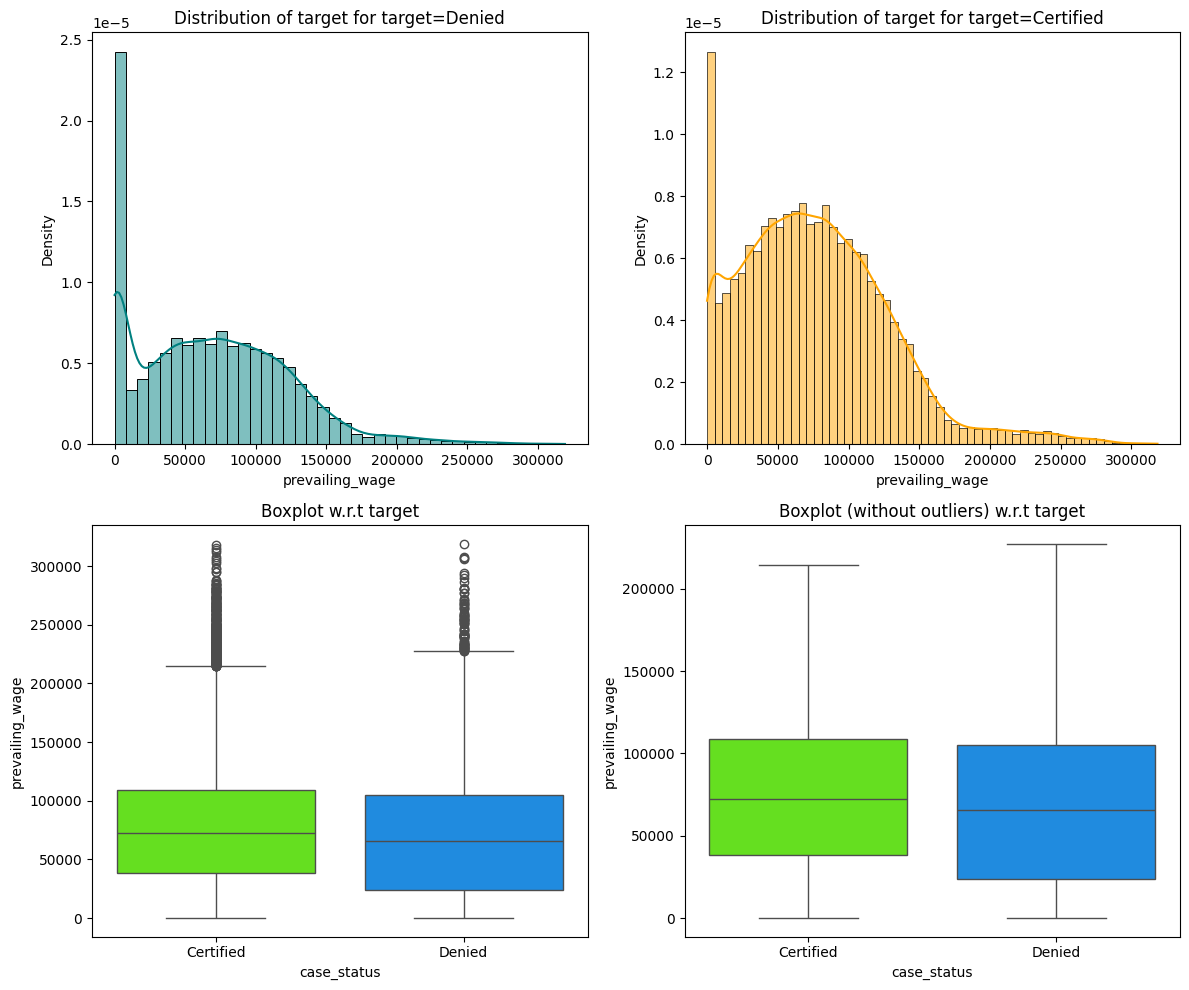

In [201]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

#### Left: Denied Applications
  The density is heavily skewed toward lower prevailing wages.
  A large number of denials occur at wages below ~$50,000.
  Denied cases thin out significantly as wages increase.

#### Right: Certified Applications
  The distribution is more balanced and centered around $60,000-$100,000.
  There's a clear shift toward higher wages compared to denied applications.
  While there are certifications at lower wages, they are less frequent.

#### Left: With Outliers
  Certified cases have a slightly higher median wage.
  Both distributions have long upper tails, but denied applications show a broader range of low wages.

#### Right: Without Outliers
  More clearly shows that the median prevailing wage for certified cases is higher than for denied ones.

  Interquartile range (middle 50%) of certified cases also tends to be higher.

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


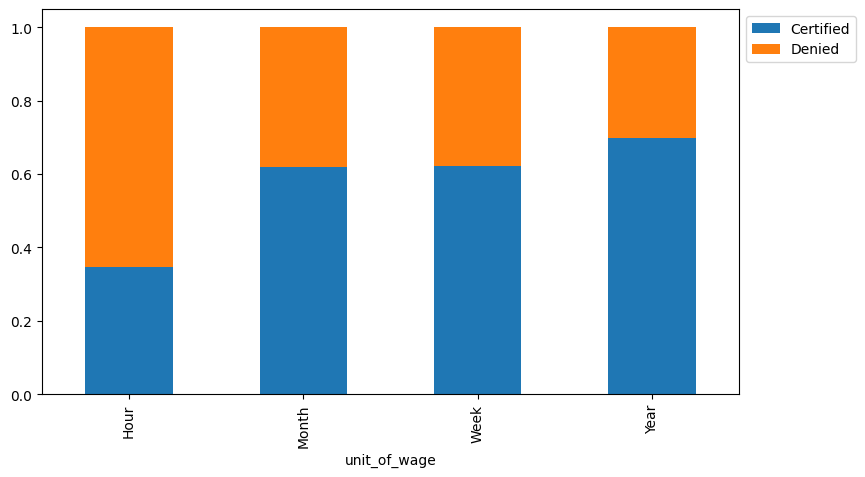

In [202]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

Yes, the unit of wage impacts visa certification likelihood:

Yearly wage offers are more likely to be approved—they are associated with higher-skilled, better-paid roles and are easier to evaluate.

Hourly wages are more frequently denied, suggesting these roles may not meet wage thresholds or are scrutinized more due to job type.

## Data Pre-processing

### Outlier Check

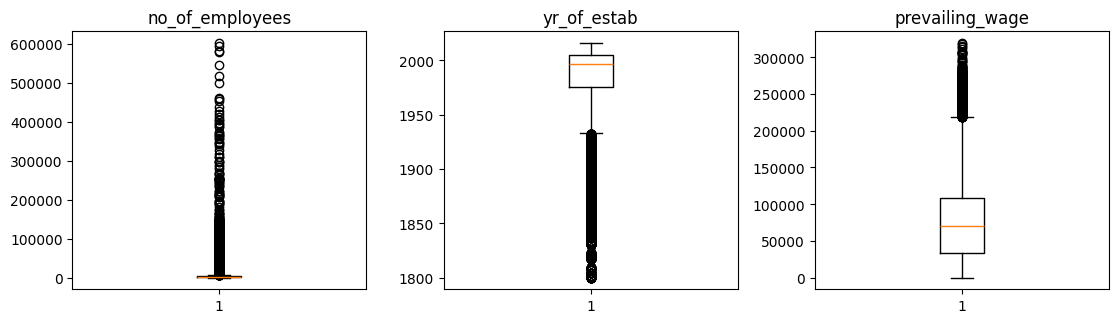

In [203]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are few outliers in the data

In [204]:
# Changing case status data type for modeling
data['case_status'] = data['case_status'].replace({'Denied': 0, 'Certified': 1})

In [205]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [206]:
#To reduce extreme values and it help your machine learning models perform better
data.yr_of_estab.max()

2016

In [207]:
# Normalizing establishment years to mitigate outlier impact
data['yr_since_estab'] = 2017 - data['yr_of_estab']

In [208]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yr_since_estab
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0,10
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1,15
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0,9
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0,120
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1,12


In [209]:
# Dropping the column year of establishment
data.drop(['yr_of_estab'], axis=1, inplace=True)
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yr_since_estab
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,0,10
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,1,15
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,0,9
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,0,120
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,1,12


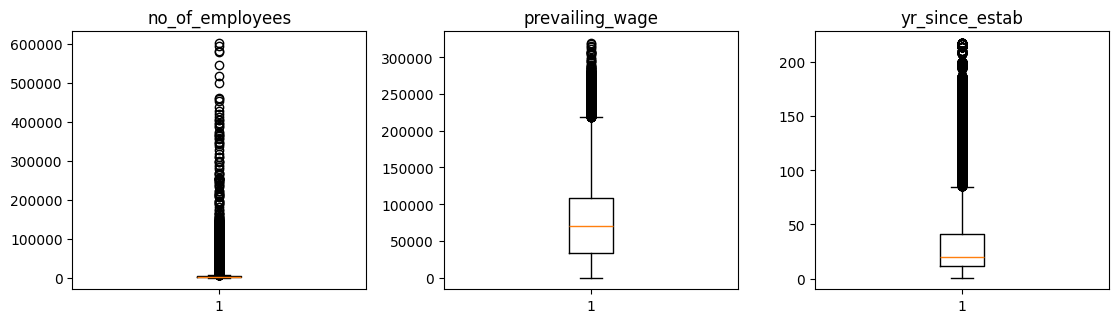

In [210]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

In [211]:
# separating the independent and dependent variables
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

In [212]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

In [213]:
X.head()

,no_of_employees,prevailing_wage,yr_since_estab,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,592.2029,10,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,2412,83425.6500,15,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True
2,44444,122996.8600,9,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True
3,98,83434.0300,120,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
4,1082,149907.3900,12,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,True


In [214]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


In [215]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (15288, 21)
Shape of Validation set :  (5096, 21)
Shape of test set :  (5096, 21)
Percentage of classes in training set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


##### Observation
Added dummies values and split the data-set as training, validation and testing

## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [216]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [217]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [218]:
scorer = metrics.make_scorer(metrics.f1_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [219]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9888344760039177
Random forest: 1.0
GBM: 0.8789422135161606
Adaboost: 0.8882468168462292
dtree: 1.0

Validation Performance:

Bagging: 0.7752643948296122
Random forest: 0.8337250293772033
GBM: 0.8733842538190364
Adaboost: 0.8807285546415982
dtree: 0.7447121034077556


In [220]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9888, Validation Score: 0.7753, Difference: 0.2136
Random forest: Training Score: 1.0000, Validation Score: 0.8337, Difference: 0.1663
GBM: Training Score: 0.8789, Validation Score: 0.8734, Difference: 0.0056
Adaboost: Training Score: 0.8882, Validation Score: 0.8807, Difference: 0.0075
dtree: Training Score: 1.0000, Validation Score: 0.7447, Difference: 0.2553


AdaBoost and GBM — they perform well and generalize strongly.

### Model Building with Oversampled data

In [221]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [222]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))
print("\nTraining and Validation Performance Difference:\n")


Training Performance:

Bagging: 0.98256611165524
Random forest: 0.9999020568070519
GBM: 0.8507345739471107
Adaboost: 0.8688540646425074
dtree: 1.0

Validation Performance:

Bagging: 0.7552878965922444
Random forest: 0.8099294947121034
GBM: 0.8413631022326674
Adaboost: 0.8672150411280846
dtree: 0.7191539365452408

Training and Validation Performance Difference:



In [223]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9826, Validation Score: 0.7553, Difference: 0.2273
Random forest: Training Score: 0.9999, Validation Score: 0.8099, Difference: 0.1900
GBM: Training Score: 0.8507, Validation Score: 0.8414, Difference: 0.0094
Adaboost: Training Score: 0.8689, Validation Score: 0.8672, Difference: 0.0016
dtree: Training Score: 1.0000, Validation Score: 0.7192, Difference: 0.2808


#### Observation

AdaBoost as the performed model for oversampled data. Consider Gradient Boosting as a strong alternative

### Model Building with Undersampled data

In [224]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [225]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [226]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.968294604174872
Random forest: 1.0
GBM: 0.7479322567940134
Adaboost: 0.715833005120126
dtree: 1.0

Validation Performance:

Bagging: 0.6160399529964747
Random forest: 0.6730317273795534
GBM: 0.7291421856639247
Adaboost: 0.7159224441833137
dtree: 0.6269095182138661


In [227]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9683, Validation Score: 0.6160, Difference: 0.3523
Random forest: Training Score: 1.0000, Validation Score: 0.6730, Difference: 0.3270
GBM: Training Score: 0.7479, Validation Score: 0.7291, Difference: 0.0188
Adaboost: Training Score: 0.7158, Validation Score: 0.7159, Difference: -0.0001
dtree: Training Score: 1.0000, Validation Score: 0.6269, Difference: 0.3731


#### Observation
Gradient Boosting (GBM) shows the best overall performance, with strong validation accuracy and minimal overfitting. It generalizes well and is the most reliable choice

## Hyperparameter Tuning

### Tuning AdaBoost using Oversampled data

Reason: AdaBoost is one of the performed model for oversampled data. so i chosen this model for hyperparameter tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

In [228]:
# AdaBoost as the performed model for oversampled data

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,75,85,100],
    "learning_rate": [1.0, 0.5, 0.1, 0.01],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -2, n_iter=48, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=48, n_jobs=-2,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [1.0, 0.5, 0.1, 0.01],
                                        'n_estimators': [50, 75, 85, 100]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

In [229]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9313418217433889:


In [230]:
tuned_ada = randomized_cv.best_estimator_
tuned_ada

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, random_state=1)

In [231]:
tuned_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, random_state=1)

In [232]:
tuned_ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
tuned_ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.646572,0.931342,0.593385,0.724909


In [233]:
## Complete the code to check the model performance for validation data.
tuned_ada_val_perf = model_performance_classification_sklearn(tuned_ada,X_val, y_val)
tuned_ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.715856,0.933901,0.722172,0.814502


#### Observation:
Validation performance is better than training, especially in precision and F1 score
The model overfit certain aspects of the training data that didn't generalize well.

### Tuning Random Forest using Undersampled data

Reason: Random Forest and Bagging achieve high training accuracy. so i chosen this model for hyperparameter tuning

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

In [234]:
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125, 150],                 # Number of trees in the forest
    "min_samples_leaf": [1, 2, 4, 5, 10],                    # Minimum samples at leaf
    "max_features": ["sqrt", "log2", 0.3, 0.5, None],        # Max features per split
    "max_samples": [0.6, 0.7, 0.8, 0.9, 1.0],                # Max samples for bootstrap
}

# Define a scorer (recall used here as an example, you can change as needed)
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,                        # Use all processors (corrected to -1)
    scoring=scorer,
    cv=5,                             # 5-fold cross-validation
    random_state=1
)

# Fitting parameters in RandomizedSearchCV on undersampled data
randomized_cv.fit(X_train_un, y_train_un)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5, None],
                                        'max_samples': [0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'n_estimators': [50, 75, 100, 125,
                                                         150]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

In [235]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'min_samples_leaf': 10, 'max_samples': 0.7, 'max_features': 'log2'} with CV score=0.7432105038594313:


In [236]:
tuned_rf = randomized_cv.best_estimator_
tuned_rf

RandomForestClassifier(max_features='log2', max_samples=0.7,
                       min_samples_leaf=10, random_state=1)

In [237]:
tuned_rf.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features='log2', max_samples=0.7,
                       min_samples_leaf=10, random_state=1)

In [238]:
tuned_rf_train_perf = model_performance_classification_sklearn(
    tuned_rf, X_train_un, y_train_un
)
tuned_rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.747341,0.777668,0.733197,0.754778


In [239]:
tuned_rf_val_perf = model_performance_classification_sklearn(tuned_rf, X_val, y_val)
tuned_rf_val_perf

,Accuracy,Recall,Precision,F1
0,0.719976,0.737662,0.824631,0.778725


#### Observation
  The gap between training and validation performance is small, suggesting low overfitting.

  
  Model is making fewer false positives in validation.

### Tuning Gradient Boosting using Oversampled data
Reason: Gradient Boosting is one of the performed model for oversampled data. so i chosen this model for hyperparameter tuning

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

In [240]:
model = GradientBoostingClassifier(random_state=1)

# Defining hyperparameters
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.1, 0.05, 0.01, 0.005],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "max_features": ["sqrt", "log2", 0.3, 0.5]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5,  # Common choice; adjust based on your data size
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

In [241]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 300, 'max_features': 0.5, 'learning_rate': 0.005} with CV score=0.8920666013712047:


In [242]:
tuned_gbm = randomized_cv.best_estimator_
tuned_gbm

GradientBoostingClassifier(learning_rate=0.005, max_features=0.5,
                           n_estimators=300, random_state=1, subsample=0.8)

In [243]:
tuned_gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
tuned_gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.745201,0.89236,0.689444,0.777887


In [244]:
## Complete the code to print the model performance on the validation data.
tuned_gbm_val_perf = model_performance_classification_sklearn(tuned_gbm,X_val, y_val)
tuned_gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.735675,0.893655,0.755401,0.818732


#### Observation
The model is very good at identifying positive cases (Recall ~89%) in both training and validation

Precision improved on the validation set (from 0.689 → 0.755), indicating fewer false positives on unseen data.

Validation F1 is slightly higher than training (0.819 vs. 0.778)

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

## Model Performance Summary and Final Model Selection

In [245]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_perf.T,
        tuned_ada_train_perf.T,
        tuned_rf_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.745201,0.646572,0.747341
Recall,0.892360,0.931342,0.777668
Precision,0.689444,0.593385,0.733197
F1,0.777887,0.724909,0.754778


In [246]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_perf.T,
        tuned_ada_val_perf.T,
        tuned_rf_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.735675,0.715856,0.719976
Recall,0.893655,0.933901,0.737662
Precision,0.755401,0.722172,0.824631
F1,0.818732,0.814502,0.778725


#### Observation
Gradient Boosting model is well-tuned and generalizes effectively. If your goal prioritizes recall and this model performs strongly.


In [247]:
# Gradient boosting model is best fit
final_model = tuned_gbm


In [248]:
# Check the performance on test set
test = model_performance_classification_sklearn(final_model, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.720565,0.88866,0.743243,0.809473


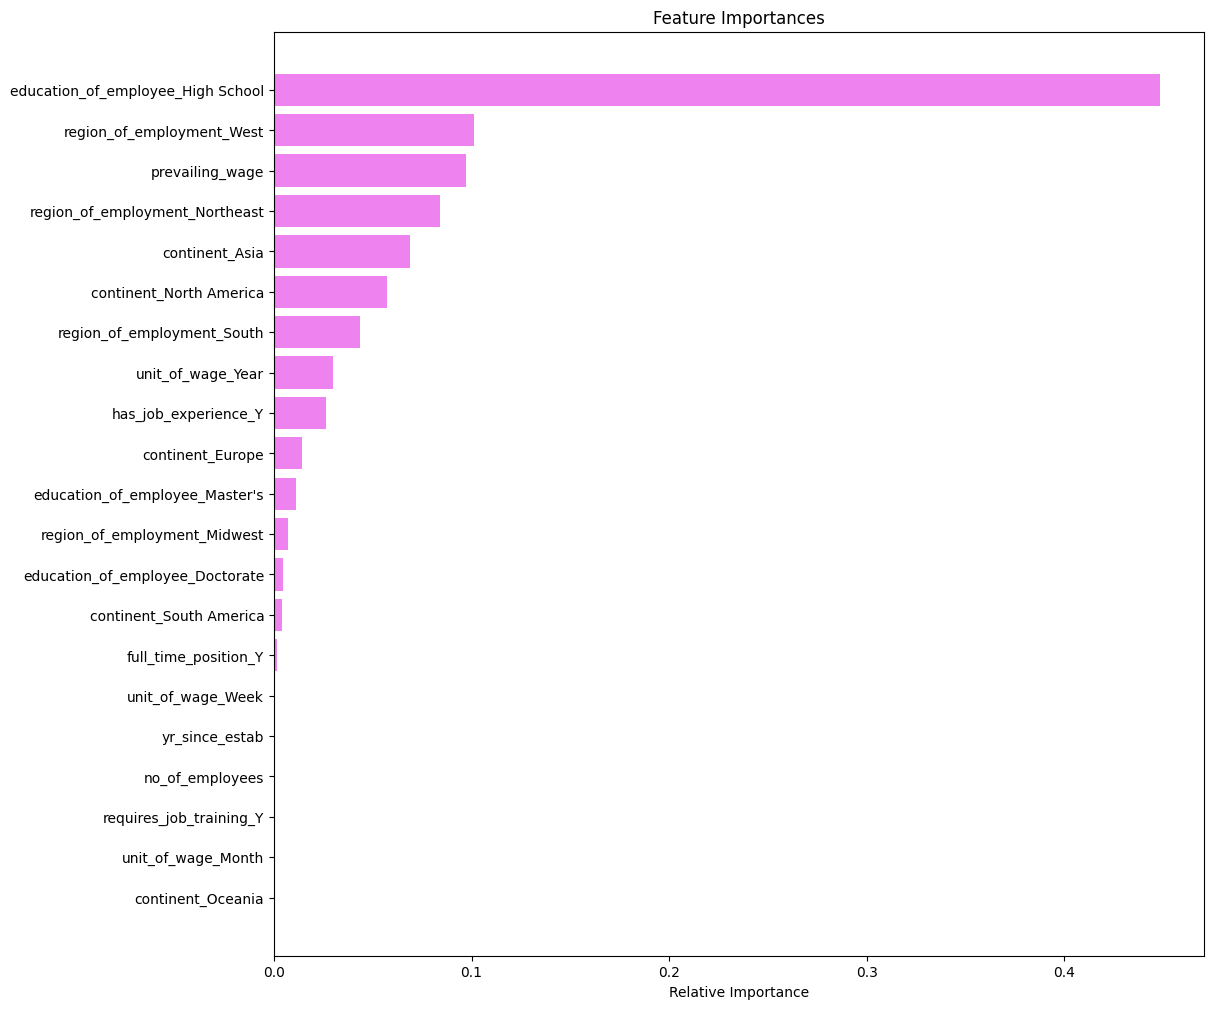

In [249]:
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

**Insights**

For the Office of Foreign Labor Certification (OFLC), the three most important factors for pre-screening an applicant are:

* Education Level

  Applicants applying for jobs that require only a high school diploma are much more likely to be denied. In contrast, applications for positions requiring a Master’s degree or Doctorate have a significantly higher likelihood of approval.

* Prior Job Experience

  Applicants without previous job experience are more likely to be denied than those with relevant experience.

* Prevailing Wage

  Higher prevailing wages are associated with a greater likelihood of application approval. This is particularly true for jobs that pay hourly wages.

* Certain regions and continents (e.g., Asia and North America) have higher application volumes, but certification rates vary by education and wage unit.

* Gradient Boosting outperforms the other models across all metrics, indicating it captures complex relationships in the data.

* Education, experience, and job type are the strongest predictors of visa case success.


* Focusing on applicant and employer education, as well as data-driven decision-making, will improve overall certification rates.


**Recommendations**

To more effectively allocate resources when screening applications, the OFLC can:

* Prioritize by Education: Sort applications by education level and review those with the highest education levels first.

* Prioritize by Experience: Sort by prior job experience and give preference to applicants with relevant experience.

* Segment by Wage Type: Separate applications into hourly and salaried wage categories. Within each group, sort by prevailing wage and review salaried applications from highest to lowest wage first.



<font size=6 color='blue'>Power Ahead</font>
___